## Part 3 – Thresholding, Morphological Operations, and Object Detection

In this section, we focus on techniques to segment and analyze objects in images using OpenCV. The main steps are:

- Converting images to **grayscale** for easier processing  
- Applying **thresholding** methods:
  - **Simple thresholding** (binary, inverse, truncation, zero, zero-inverse)  
  - **Adaptive thresholding** (mean and Gaussian) for images with uneven lighting  
  - **Otsu’s thresholding** for automatic threshold selection  
- Using **morphological operations** to clean up images:
  - Dilation, erosion  
  - Opening and closing  
- Removing unwanted lines and artifacts using **structuring elements** and morphological subtraction  
- **Connected component analysis** to count distinct objects in a binary image  
- **Contour detection and analysis** to detect shapes, calculate areas, and mark object centers  
- Detecting and labeling **letters, words, and coins** in images  

By completing this part, you will gain practical skills to **segment, detect, and count objects**, as well as process complex images with noise or overlapping elements.


We start by importing the necessary libraries:

- **NumPy** – for numerical operations on arrays  
- **OpenCV (cv2)** – for computer vision and image processing  
- **Matplotlib** – for visualization and plotting 

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

We load and prepare the image for processing:

- **Read the image** from the `Pictures` folder.  
- **Convert it to grayscale** using `cv.cvtColor`, since many thresholding methods work on single-channel images.  
- **Display the grayscale image** using Matplotlib with the `"gray"` colormap.  


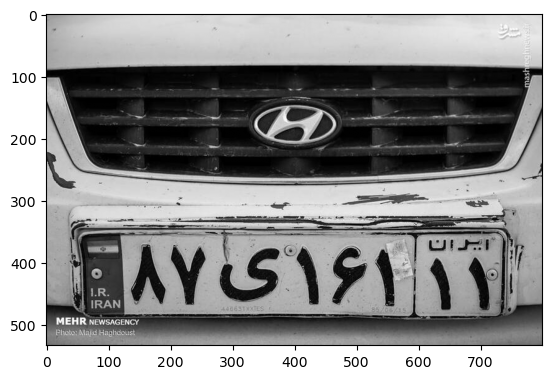

In [2]:
img=cv.imread("./Pictures/2461881.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

We apply different **thresholding techniques** in OpenCV to the grayscale image:

- **Binary (`cv.THRESH_BINARY`)**: pixels above the threshold become white, others become black.  
- **Binary Inverse (`cv.THRESH_BINARY_INV`)**: opposite of binary.  
- **Truncate (`cv.THRESH_TRUNC`)**: values above the threshold are set to the threshold.  
- **To Zero (`cv.THRESH_TOZERO`)**: values below the threshold are set to zero.  
- **To Zero Inverse (`cv.THRESH_TOZERO_INV`)**: values above the threshold are set to zero.  

Each result is displayed in a subplot alongside the **original image**, so we can compare how each thresholding method affects the image.  


Text(0.5, 1.0, 'orginal')

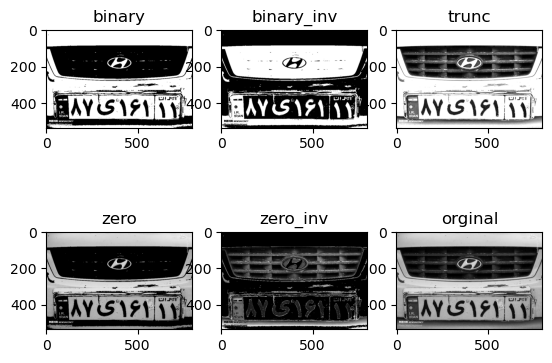

In [3]:
th=127
_,binary=cv.threshold(img,th,255,cv.THRESH_BINARY)
_,binary_inv=cv.threshold(img,th,255,cv.THRESH_BINARY_INV)
_,trunc=cv.threshold(img,th,255,cv.THRESH_TRUNC)
_,zero=cv.threshold(img,th,255,cv.THRESH_TOZERO)
_,zero_inv=cv.threshold(img,th,255,cv.THRESH_TOZERO_INV)

plt.subplot(2,3,1); plt.imshow(binary,cmap="gray");plt.title("binary")
plt.subplot(2,3,2); plt.imshow(binary_inv,cmap="gray");plt.title("binary_inv")
plt.subplot(2,3,3); plt.imshow(trunc,cmap="gray");plt.title("trunc")
plt.subplot(2,3,4); plt.imshow(zero,cmap="gray");plt.title("zero")
plt.subplot(2,3,5); plt.imshow(zero_inv,cmap="gray");plt.title("zero_inv")
plt.subplot(2,3,6); plt.imshow(img,cmap="gray");plt.title("orginal")

We create an **interactive thresholding tool** using OpenCV trackbars:

- The grayscale image is loaded as input.  
- Two **trackbars** are added:
  - **TH_value**: controls the threshold value (0–255).  
  - **TH_type**: lets us select which thresholding method to apply.  

The available thresholding types include:  
- `cv.THRESH_BINARY`  
- `cv.THRESH_BINARY_INV`  
- `cv.THRESH_TRUNC`  
- `cv.THRESH_TOZERO`  
- `cv.THRESH_TOZERO_INV`  

As we move the sliders, the threshold is updated in real-time, allowing us to experiment with different threshold values and methods.  
Press **Esc** to exit the window.  


In [4]:

img=cv.imread("./Pictures/2461881.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

def thereshold(value):
    pass
def tayp(value):
    pass    

cv.namedWindow("image")
#cv.createTrackbar(TH_type,"image",)
cv.createTrackbar("TH_value","image",0,255,thereshold)
cv.createTrackbar("TH_type","image",0,5,tayp)
while True:
    if cv.waitKey(1)==27:
        break
    val=cv.getTrackbarPos("TH_value","image")    
    tay=cv.getTrackbarPos("TH_type","image") 
    various=[cv.THRESH_BINARY,cv.THRESH_BINARY_INV, cv.THRESH_TRUNC ,cv.THRESH_TOZERO,cv.THRESH_TOZERO_INV]
    a=various[tay]
    _,total=cv.threshold(img,val,255,a)
    cv.imshow("image",total)
cv.destroyAllWindows()    
    

### Otsu’s Thresholding and Adaptive Thresholding 

#### 1. Otsu’s Thresholding  
- Normally, thresholding requires you to **manually choose a threshold value** (e.g., 127).  
- But what if the image has **different lighting conditions** and the “best” threshold isn’t obvious?  
- Otsu’s method automatically finds the **optimal threshold value** by:  
  - Analyzing the histogram of pixel intensities.  
  - Separating pixels into two classes (foreground & background).  
  - Minimizing the **intra-class variance** (variation within each group).  
- Advantage: You don’t need to manually pick a threshold.  
- Limitation: Works best when the image has a clear **bimodal histogram** (two peaks, like foreground vs. background).  

#### 2. Adaptive Mean Thresholding  
- Instead of using a single threshold for the entire image, the threshold is computed **locally** for each pixel.  
- The threshold at each pixel = **mean value of its neighborhood** (a block of nearby pixels) minus a constant.  
- Advantage: Handles **uneven lighting** well.  
- Limitation: May cause “blocky” effects if block size is too small.  

#### 3. Adaptive Gaussian Thresholding  
- Similar to Adaptive Mean, but instead of a simple average, it uses a **weighted sum of neighborhood pixels** where closer pixels have more weight (Gaussian distribution).  
- Advantage: Produces **smoother and more natural** results than Adaptive Mean.  
- Best when the image has **gradual changes in illumination**.  

---

### Summary of Use Cases  
- **Fixed Binary**: Quick and simple, but only good for uniformly lit images.  
- **Otsu**: Great when you want an automatic global threshold.  
- **Adaptive Mean**: Better for images with local variations in lighting.  
- **Adaptive Gaussian**: Similar to Adaptive Mean, but smoother and more robust for complex lighting.  


In this section, we compare different **thresholding techniques**:  

1. **Binary Thresholding** (`cv.THRESH_BINARY`) – applies a fixed threshold (127 in this case).  
2. **Otsu’s Thresholding** (`cv.THRESH_OTSU`) – automatically calculates the optimal threshold value by minimizing intra-class variance.  
3. **Adaptive Mean Thresholding** (`cv.ADAPTIVE_THRESH_MEAN_C`) – threshold value is the mean of the neighborhood pixels.  
4. **Adaptive Gaussian Thresholding** (`cv.ADAPTIVE_THRESH_GAUSSIAN_C`) – threshold value is a weighted sum of neighborhood pixels using a Gaussian window.  

The results are displayed side by side:  
- **Original image**  
- **Otsu’s result**  
- **Fixed binary threshold**  
- **Adaptive Mean result**  
- **Adaptive Gaussian result**  

This allows us to visually compare how each method handles varying lighting and contrasts in the image.  


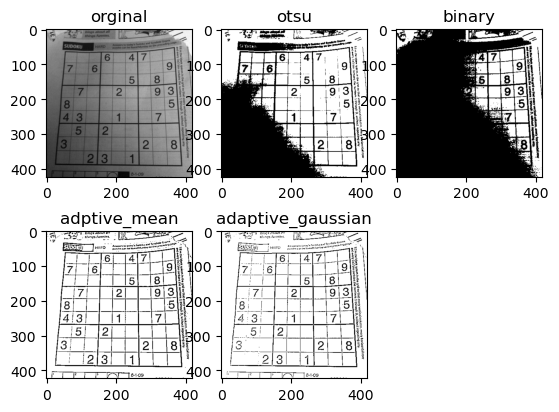

In [9]:

img=cv.imread("./Pictures/sudoku.jpg",0)
#img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

_,img_otsu=cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
_,img_binary=cv.threshold(img,127,255,cv.THRESH_BINARY)
img_adp_mean=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,10)
img_adp_gus=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,10)

imges=[img,img_otsu,img_binary,img_adp_mean,img_adp_gus]
titles=["orginal","otsu","binary","adptive_mean","adaptive_gaussian"]

for i in range(5):
    
    plt.subplot(2,3,i+1); plt.imshow(imges[i],cmap="gray"); plt.title(titles[i])




### Thresholding with Preprocessing (Gaussian Blur)

In this example, we compare different thresholding techniques and see how **preprocessing with Gaussian Blur** can improve results.

1. **Original Image**  
   The input image is first converted to grayscale for thresholding.

2. **Otsu’s Thresholding**  
   - Automatically calculates an optimal global threshold.  
   - Works well if the image histogram has two distinct peaks.  

3. **Adaptive Mean Thresholding**  
   - Computes the threshold locally for each pixel.  
   - The threshold is the **mean of neighboring pixels** minus a constant.  

4. **Adaptive Gaussian Thresholding**  
   - Similar to Adaptive Mean, but uses a **Gaussian-weighted sum** of neighbors.  
   - Produces smoother and more natural segmentation.  

5. **Adaptive Mean after Gaussian Blur**  
   - Before applying thresholding, the image is smoothed using a Gaussian filter.  
   - Noise is reduced, which helps the thresholding step give cleaner regions.  

6. **Adaptive Gaussian after Gaussian Blur**  
   - Combines the benefits of noise reduction (Gaussian Blur) and local adaptive Gaussian thresholding.  
   - Produces the most stable and smooth result for noisy or unevenly lit images.  

---

### Why Use Gaussian Blur Before Thresholding?  
- Real-world images often contain **noise, small details, or uneven lighting**.  
- Thresholding directly on such images may lead to broken or noisy results.  
- **Blurring smooths the image**, reducing noise while preserving main edges.  
- As a result, adaptive thresholding becomes more **robust and accurate**.  


Text(0.5, 1.0, 'adaptive_gussian_filter')

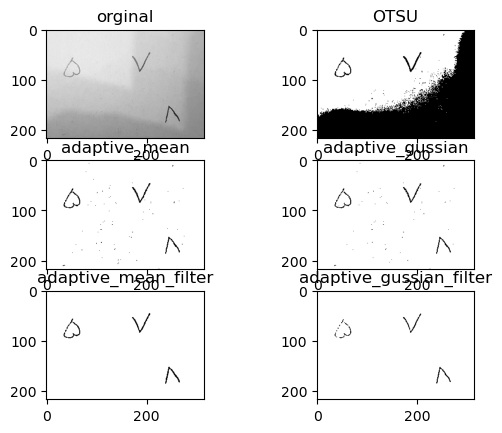

In [16]:
img=cv.imread("./Pictures/adad.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_,img_otsu=cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
img_adp_mean=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,10)
img_adp_gus=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,10)

blurred_img = cv.GaussianBlur(img, (5, 5), 0)
img_blur_mean=cv.adaptiveThreshold(blurred_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,10)
img_blur_gus=cv.adaptiveThreshold(blurred_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7,10)
plt.subplot(3,2,1);plt.imshow(img,cmap="gray"); plt.title("orginal")
plt.subplot(3,2,2);plt.imshow(img_otsu,cmap="gray"); plt.title("OTSU")
plt.subplot(3,2,3);plt.imshow(img_adp_mean,cmap="gray");plt.title("adaptive_mean")
plt.subplot(3,2,4);plt.imshow(img_adp_gus,cmap="gray"); plt.title("adaptive_gussian")
plt.subplot(3,2,5);plt.imshow(img_blur_mean,cmap="gray");plt.title("adaptive_mean_filter")
plt.subplot(3,2,6);plt.imshow(img_blur_gus,cmap="gray"); plt.title("adaptive_gussian_filter")

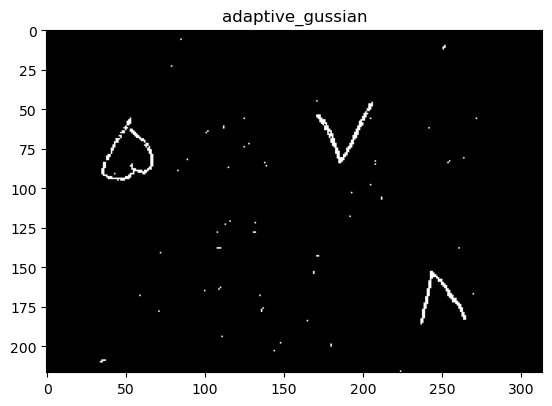

In [18]:
plt.imshow(cv.bitwise_not(img_adp_gus),cmap="gray"); plt.title("adaptive_gussian")
img_adp_gus=cv.bitwise_not(img_adp_gus)

### Morphological Transformations

After thresholding, images often contain **noise, broken edges, or small holes**.  
Morphological operations are useful for **refining binary images**.

1. **Kernel Definition**  
   - A small matrix (here, `2x2` of ones) defines the shape used for transformations.  
   - Can also be customized with `cv.getStructuringElement()` (e.g., cross, ellipse, rectangle).  

2. **Dilation (`cv.dilate`)**  
   - Expands white regions (foreground).  
   - Useful for **connecting broken parts** of an object.  

3. **Erosion (`cv.erode`)**  
   - Shrinks white regions by eroding boundaries.  
   - Removes **small white noise** and separates objects that are close together.  

4. **Opening (`cv.morphologyEx` with `MORPH_OPEN`)**  
   - **Erosion followed by dilation**.  
   - Removes **small noise** while keeping main object size consistent.  

5. **Closing (`cv.morphologyEx` with `MORPH_CLOSE`)**  
   - **Dilation followed by erosion**.  
   - Fills **small holes or gaps** inside the foreground object.  

---

### Summary of Effects:
- **Dilation** → Connects & enlarges shapes.  
- **Erosion** → Reduces shapes & removes noise.  
- **Opening** → Cleans small noise.  
- **Closing** → Fills small gaps/holes.  

These operations are widely used in **preprocessing** before contour detection, segmentation, or feature extraction.


Text(0.5, 1.0, 'closing')

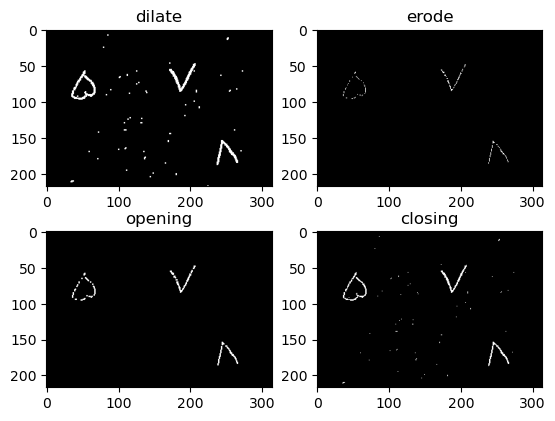

In [19]:
kernel=np.ones((2,2),"uint8")
#kernel=cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

dilate=cv.dilate(img_adp_gus,kernel,iterations=1)
erode=cv.erode(img_adp_gus,kernel,iterations=1)

opening=cv.morphologyEx(img_adp_gus, cv.MORPH_OPEN, kernel)
close=cv.morphologyEx(img_adp_gus, cv.MORPH_CLOSE, kernel)
plt.subplot(2,2,1);plt.imshow(dilate,cmap="gray"); plt.title("dilate")
plt.subplot(2,2,2);plt.imshow(erode,cmap="gray");plt.title("erode")
plt.subplot(2,2,3);plt.imshow(opening,cmap="gray");plt.title("opening")
plt.subplot(2,2,4);plt.imshow(close,cmap="gray");plt.title("closing")



Text(0.5, 1.0, 'opening+dilation')

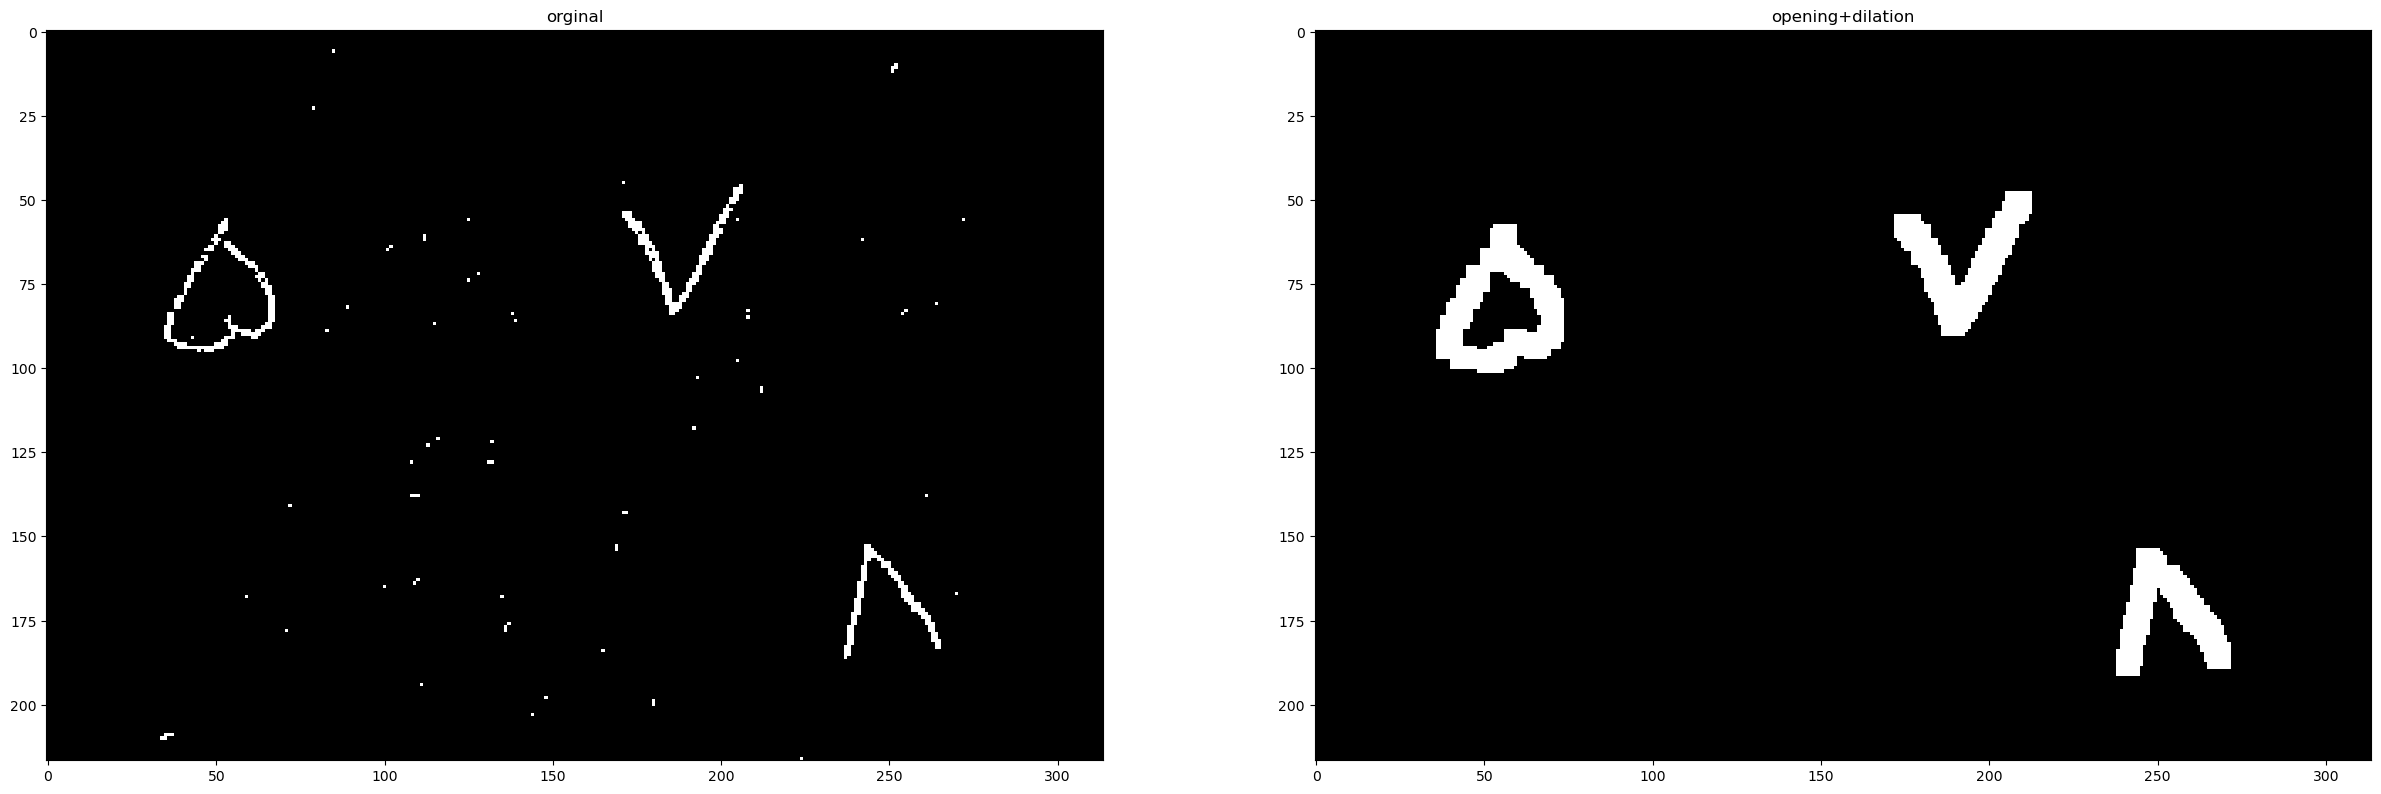

In [42]:
fig = plt.figure(figsize=(30, 20))
kernel=np.ones((2,2),"uint8")
dilate=cv.dilate(opening,kernel,iterations=5)
plt.subplot(121);plt.imshow(img_adp_gus,cmap="gray");plt.title("orginal")
plt.subplot(122);plt.imshow(dilate,cmap="gray");plt.title("opening+dilation")

### Removing Horizontal Lines from an Image

This example demonstrates how to use **morphological operations** to detect and remove horizontal lines (such as those in scanned documents, tables, or forms).

1. **Preprocessing**  
   - Convert the image to **grayscale**.  
   - Invert it with `cv.bitwise_not()` so that text/lines become **white on black background** (easier for morphology).  

2. **Horizontal Structuring Element**  
   - A rectangular kernel of size `(40, 1)` is created with `cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))`.  
   - This kernel is designed to detect **horizontal patterns** of length ~40 pixels.  

3. **Opening Operation (`MORPH_OPEN`)**  
   - Performs **erosion followed by dilation**.  
   - With the horizontal kernel, this isolates **horizontal lines** in the image.  

4. **Subtraction Step**  
   - Subtract the detected horizontal lines (`img_open`) from the original inverted image (`img2`).  
   - Result: image without horizontal lines while keeping the rest (like text) intact.  

---

### Summary of Results:
- **Original image (inverted)** → contains text + lines.  
- **After opening** → isolates only the horizontal lines.  
- **Subtraction** → produces an image where the horizontal lines are removed, leaving just the text.  

This technique is commonly used in **document preprocessing**, such as:  
- Removing table lines before OCR (Optical Character Recognition).  
- Cleaning scanned forms or handwritten notes.  


Text(0.5, 1.0, 'subtraction')

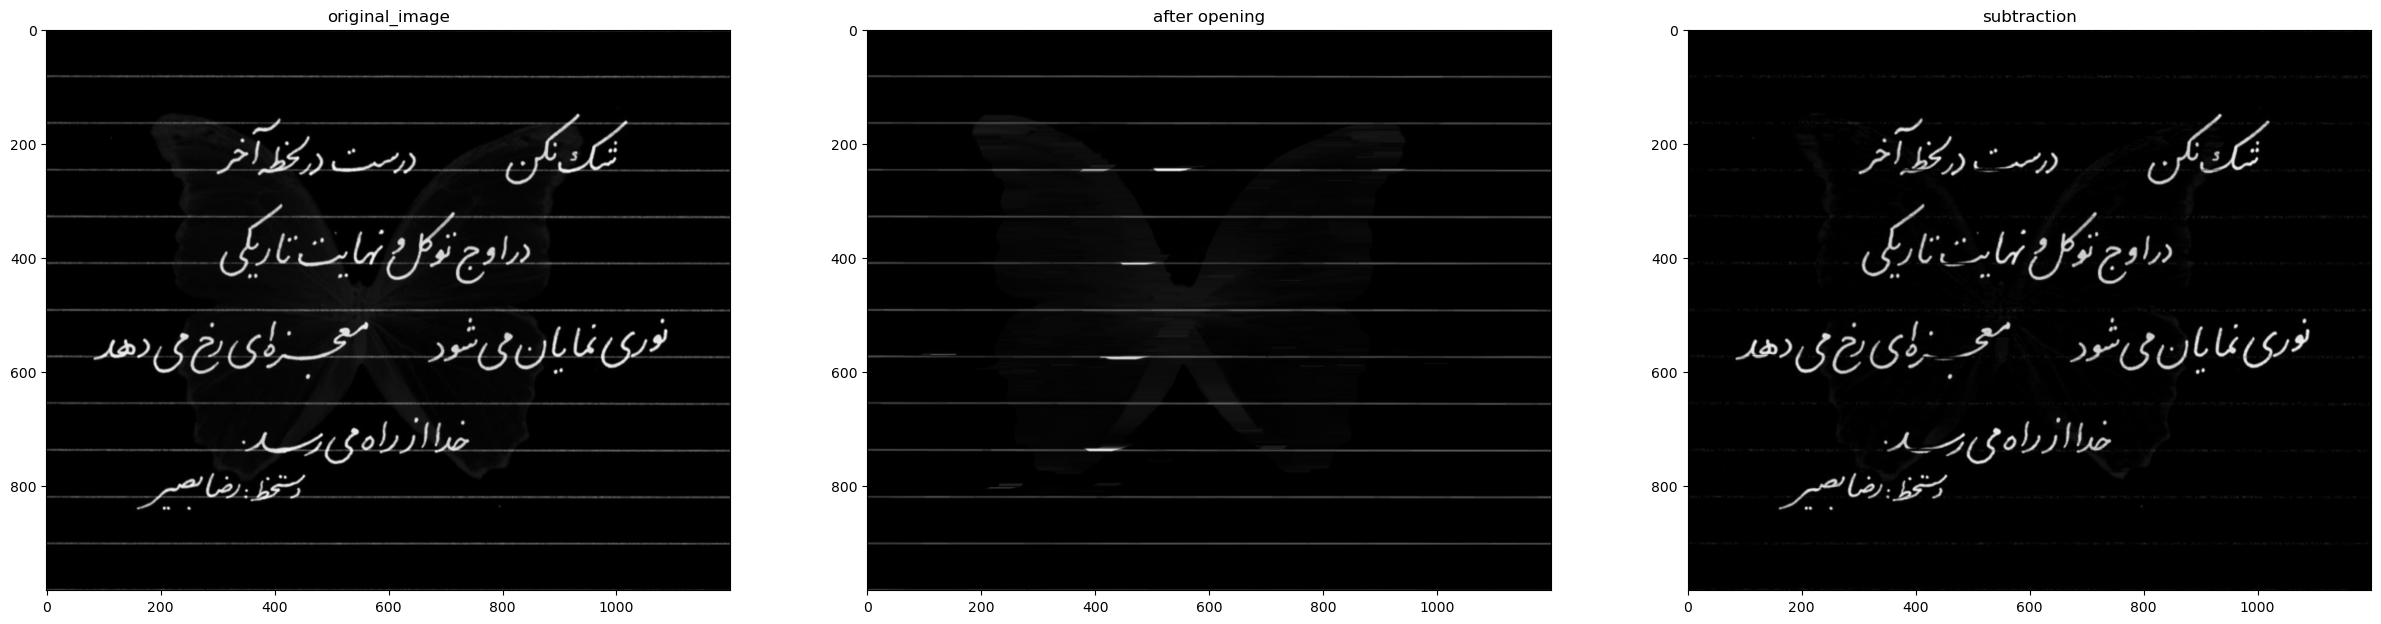

In [20]:
img=cv.imread("./Pictures/neveshteh.jpg")
img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#_,img2=cv.threshold(img1,127,255,cv.THRESH_OTSU)
img2=cv.bitwise_not(img1)

# Create the horizontal structuring element
horizontal_size = 40  # Example width, adjust as needed
horizontal_kernel = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
img_open=cv.morphologyEx(img2,cv.MORPH_OPEN,horizontal_kernel)


img_withourlin=cv.subtract(img2,img_open)
fig=plt.figure(figsize=(30,20))
plt.subplot(1,3,1);plt.imshow(img2,cmap="gray");plt.title("original_image")
plt.subplot(1,3,2);plt.imshow(img_open,cmap="gray");plt.title("after opening")
plt.subplot(1,3,3);plt.imshow(img_withourlin,cmap="gray");plt.title("subtraction")



### Connected Components Analysis

In this example, we use **connected components** to detect and label distinct objects in an image.

---

#### Steps:

1. **Preprocessing**
   - Convert the image to **grayscale**.  
   - Apply a **Gaussian blur** to reduce noise.  
   - Use **adaptive thresholding** (`cv.adaptiveThreshold`) to binarize the image.  
   - Invert the binary image so that objects appear white on a black background.  
   - Apply **dilation** to strengthen object boundaries.

2. **Connected Components (`cv.connectedComponents`)**
   - Labels each connected white region (object) in the binary image with a unique ID.  
   - Returns the number of connected objects (`num`) and a labeled image (`labeled_img`).  
   - Here, the background is labeled as `0`, and objects are labeled `1, 2, 3, ...`.
 **How `cv.connectedComponents` works:**  
- It scans the binary image pixel by pixel.  
- White pixels that are **connected** (based on 4- or 8-connectivity) are grouped into the same component.  
- Each connected region is assigned a **unique label**.  
- Background pixels are labeled as `0`, and objects are labeled starting from `1`.  
- The function returns the **total number of labels** and a **labeled image** where each pixel’s value corresponds to its component label.


3. **Coloring the Components**
   - A new 3-channel image (`new_labeled`) is created to visualize objects with different colors.  
   - Each label is mapped to a color channel (e.g., object 1 → red, object 2 → green, object 3 → blue).  

4. **Results**
   - The left subplot shows the **binary image** after preprocessing.  
   - The right subplot shows the **colored labeled image**, where each object has a distinct color.  
   - The number of detected objects is printed (`num - 1`, subtracting the background).

---

#### Applications
- Counting distinct objects (e.g., cells in microscopy images, coins, or shapes).  
- Extracting object properties (area, centroid, bounding box).  
- Preprocessing for segmentation or object detection pipelines.


number of objects in this picture is 3


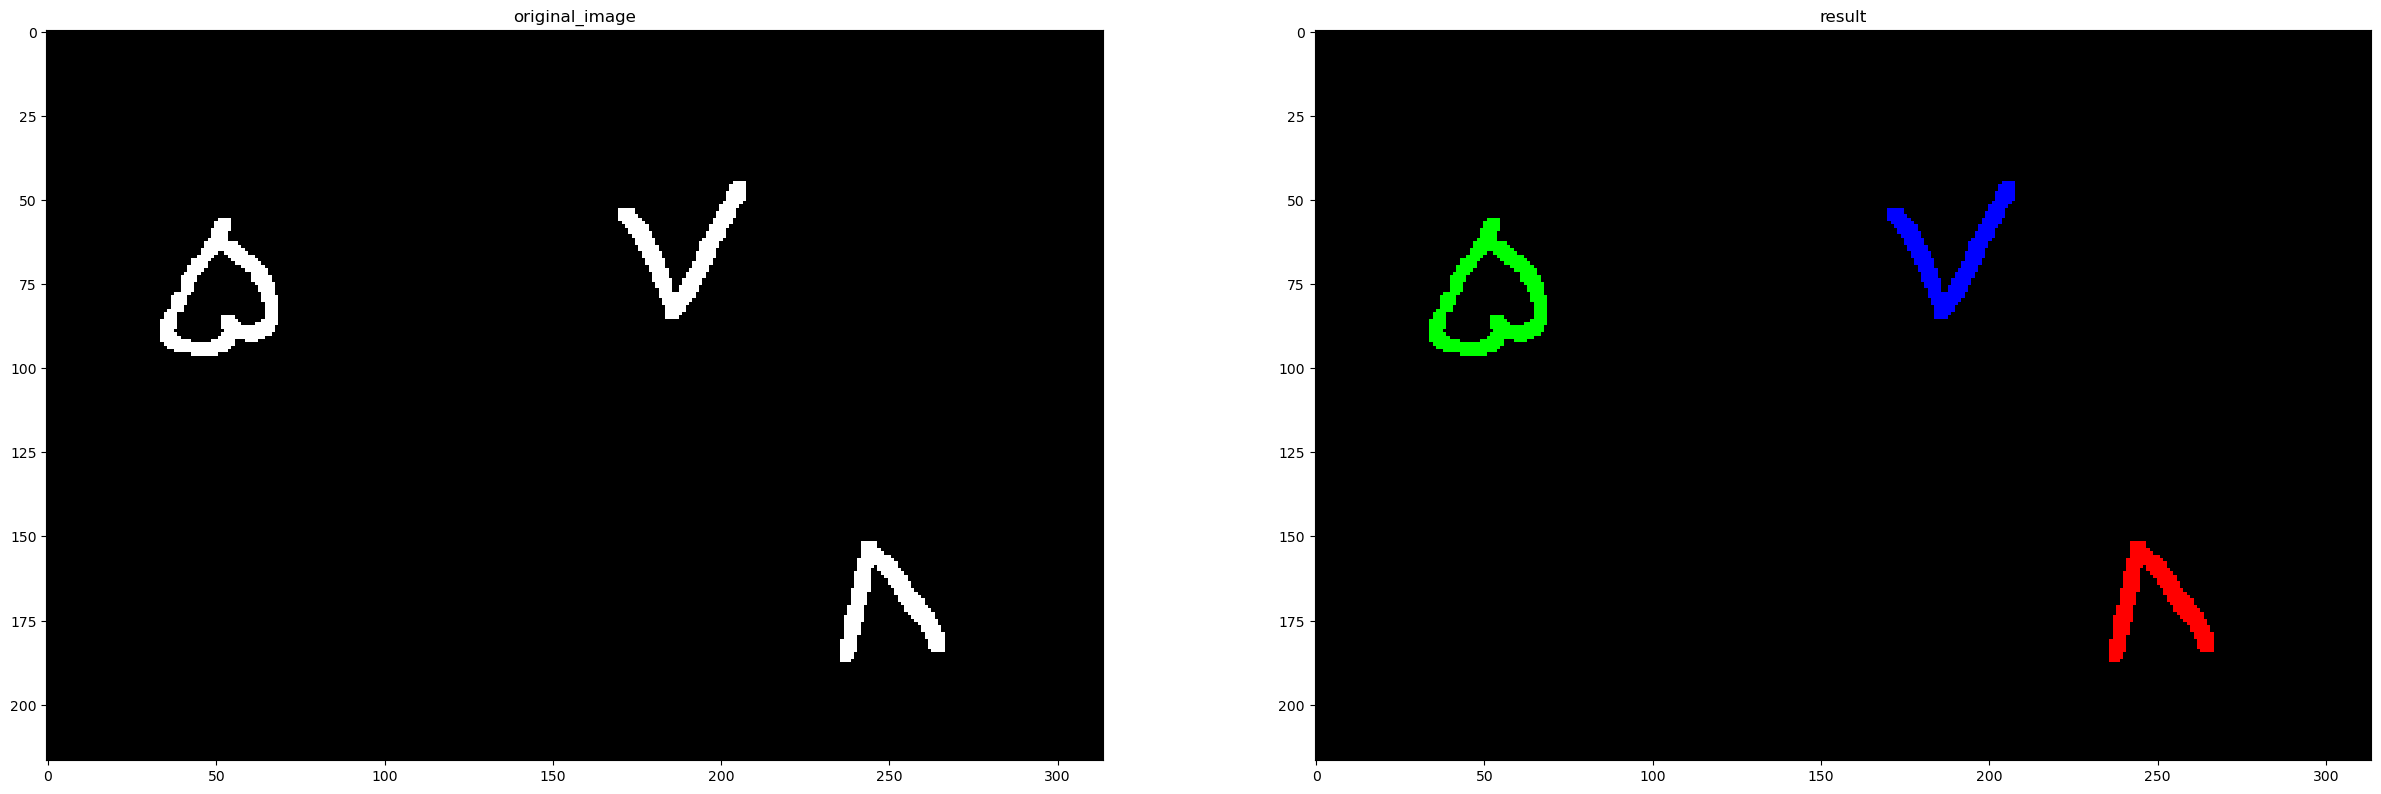

In [24]:
img=cv.imread("./Pictures/adad.jpg")
img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img1 = cv.GaussianBlur(img1, (5, 5), 0)
img2=cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,10)
img2=cv.bitwise_not(img2)
kernel=np.ones((3,3))
img2=cv.dilate(img2,kernel,iterations=1)
#plt.imshow(img2,cmap="gray")
num,labeled_img=cv.connectedComponents(img2)
new_labeled=np.zeros((labeled_img.shape[0],labeled_img.shape[1],3))
for i in range(labeled_img.shape[0]):
    for j in range(labeled_img.shape[1]):
        if labeled_img[i,j]==0:
            continue
        elif labeled_img[i,j]==1:
            new_labeled[i,j,2]=1
            
        elif labeled_img[i,j]==2:
            new_labeled[i,j,1]=1 
            
        elif labeled_img[i,j]==3:
            new_labeled[i,j,0]=1
#plt.imshow(new_labeled)
fig=plt.figure(figsize=(30,20))
plt.subplot(1,2,1);plt.imshow(img2,cmap="gray");plt.title("original_image")
plt.subplot(1,2,2);plt.imshow(new_labeled);plt.title("result")
print(f"number of objects in this picture is {num-1}")

### Contour Detection with OpenCV

This example demonstrates how to **detect and draw contours** of objects in a binary image.

---

#### Steps:

1. **Preprocessing**
   - Convert the image to **grayscale**.  
   - Apply a **Gaussian blur** to reduce noise.  
   - Use **adaptive thresholding** (`cv.adaptiveThreshold`) to binarize the image.  
   - Invert the binary image so that objects are white and background is black.

2. **Find Contours**
   - `cv.findContours()` detects the boundaries of objects in the binary image.  
   - Parameters:
     - `cv.RETR_TREE` → retrieves all contours and reconstructs a full hierarchy of nested contours.  
     - `cv.CHAIN_APPROX_SIMPLE` → compresses horizontal, vertical, and diagonal segments to save memory.

3. **Draw Contours**
   - Convert the binary image to **BGR** using `cv.cvtColor` to allow colored drawing.  
   - Use `cv.drawContours()` to draw a specific contour (here, contour index 3) in **green** with thickness 3.

---

#### Notes:
- Contours are useful for:
  - Shape analysis
  - Object detection
  - Measuring area, perimeter, or centroid of objects
- Indexing contours allows you to selectively draw or analyze specific objects.


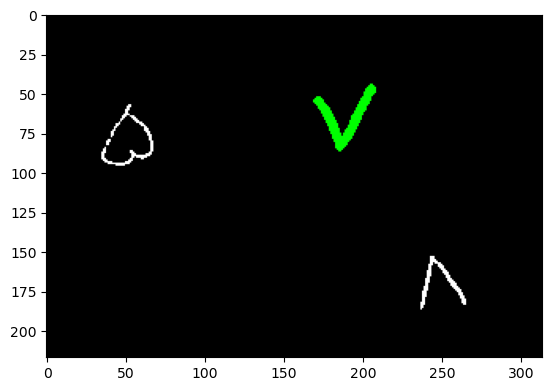

In [2]:
#find contours in image
img=cv.imread("./Pictures/adad.jpg")
img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img1 = cv.GaussianBlur(img1, (5, 5), 0)
img2=cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,7,10)
img2=cv.bitwise_not(img2)
contours, hierarchy=cv.findContours(img2,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
new_img2=cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
img3=cv.drawContours(new_img2,contours,3,(0,255,0),3)

plt.imshow(img3)

### Object Detection using Contours and Bounding Rectangles

This example demonstrates **detecting objects** in an image and drawing **bounding rectangles** around them.

---

#### Steps:

1. **Preprocessing**
   - Convert the image to **grayscale**.  
   - Apply **Otsu's thresholding** to automatically binarize the image.  
   - Invert the binary image using `cv.bitwise_not()` so objects are white.  
   - Apply **morphological closing** (`cv.MORPH_CLOSE`) to remove small holes and connect nearby regions.  

2. **Find Contours**
   - `cv.findContours()` detects object boundaries in the processed binary image.  

3. **Draw Bounding Rectangles**
   - Loop through each contour and compute its bounding rectangle using `cv.boundingRect()`.  
   - Draw the rectangle on a copy of the original image using `cv.rectangle()` in **yellow**.  

---

#### Notes:
- Bounding rectangles provide a simple way to **localize objects**.  
- This approach is often used in object detection tasks when contour information is sufficient.  
- Unlike `cv.connectedComponents`, this method focuses on **per-object geometry** rather than labeling every pixel.


Text(0.5, 1.0, 'object detaction')

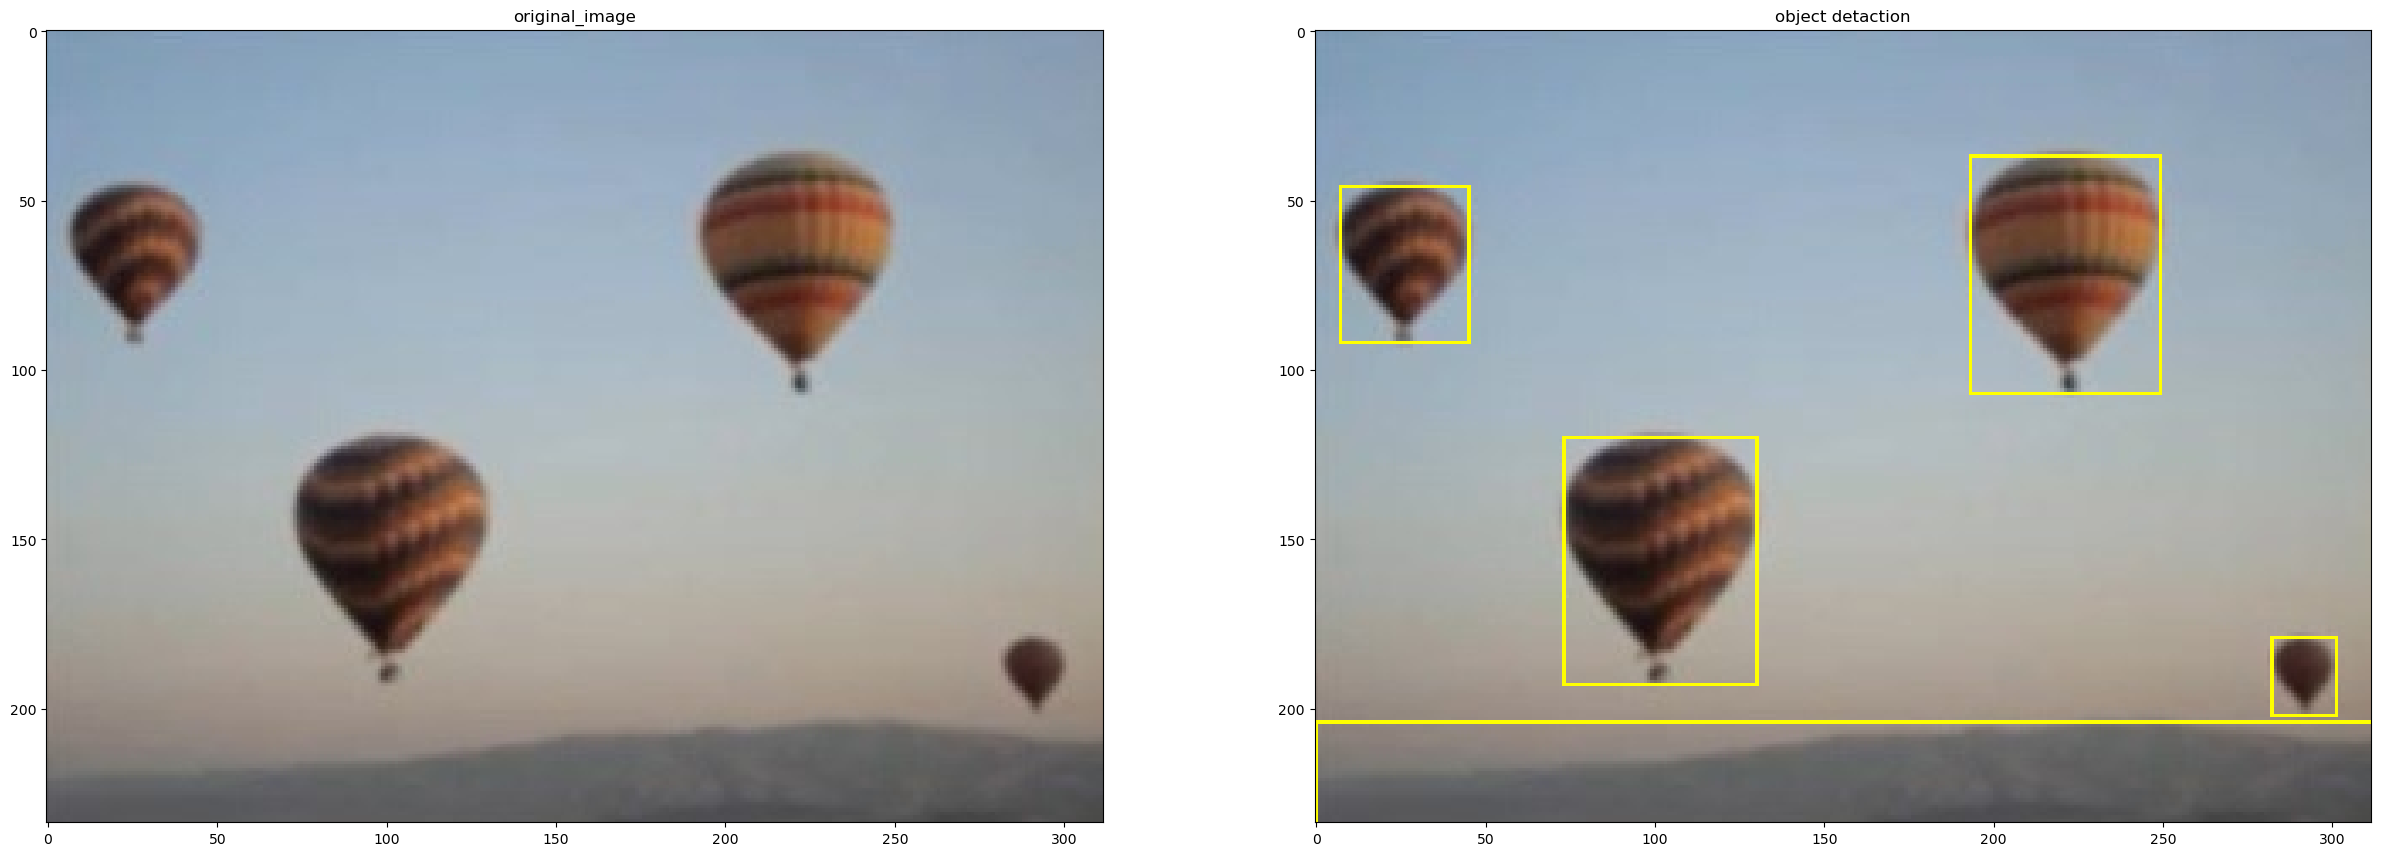

In [25]:
img=cv.imread("./Pictures/baloon.jpg")

img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_,img2=cv.threshold(img1,127,255,cv.THRESH_OTSU)
img3=cv.bitwise_not(img2)
kernel=np.ones((3,3))
close=cv.morphologyEx(img3, cv.MORPH_CLOSE, kernel)
#plt.imshow(close,cmap="gray")
contours, hierarchy=cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
temp=img.copy()
for i in range(len(contours)):
    
    x, y, w, h =cv.boundingRect(contours[i])
    cv.rectangle(temp,(x,y),(x+w,y+h),(0,255,255),1)
#plt.imshow(temp[:,:,::-1])  
fig=plt.figure(figsize=(30,20))
plt.subplot(1,2,1);plt.imshow(img[:,:,::-1]);plt.title("original_image")
plt.subplot(1,2,2);plt.imshow(temp[:,:,::-1]);plt.title("object detaction")

### Identifying and Labeling the Largest Objects

In this example, we detect objects and **label them based on size**.

---

#### Steps:

1. **Find Contours**
   - `cv.findContours()` detects all object boundaries in the processed image.

2. **Compute Contour Properties**
   - For each contour:
     - Calculate its **area** using `cv.contourArea()`.  
     - Compute its **centroid** using image moments (`cv.moments()`), where:
       - `cx = m10 / m00`  
       - `cy = m01 / m00`  
     - Draw the **bounding rectangle** around the contour.  
     - Mark the **centroid** with a small green circle.

3. **Rank Objects by Size**
   - Sort contours based on **area** to find the largest objects.  
   - Label the top N objects (here, 5) with numbers at their centroids using `cv.putText()`.  

---

#### Notes:
- This method is useful for **object prioritization**, e.g., identifying the largest objects in a scene.  
- Centroids and bounding boxes provide both **location and size information** for each object.


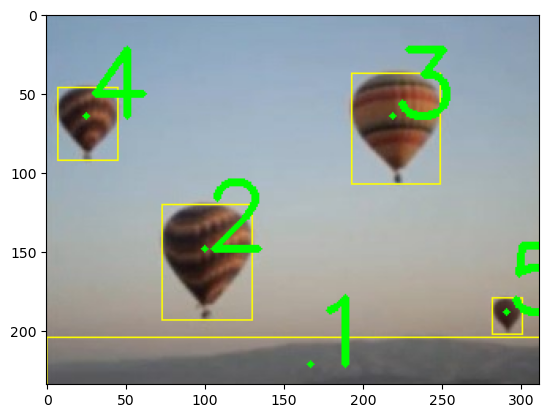

In [26]:
#which one is the largest

contoures, hierarchy=cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
temp=img.copy()

all_contourarea=[]
for i in range(len(contoures)):
    
    all_moments=cv.moments(contoures[i])
    all_contourarea.append(cv.contourArea(contoures[i]))
    x, y, w, h =cv.boundingRect(contours[i])
    cv.rectangle(temp,(x,y),(x+w,y+h),(0,255,255),1)
    cx=int(all_moments["m10"]/all_moments["m00"])
    cy=int(all_moments["m01"]/all_moments["m00"])
    cv.circle(temp,(cx,cy),2,(0,255,0),-1)
plt.imshow(temp[:,:,::-1])       
k=0
contoures=list(contoures)
for _ in range(5):  
    k+=1
    i=all_contourarea.index(max(all_contourarea))
    all_contourarea.pop(i)
    all_moments=cv.moments(contoures[i])
    contoures.pop(i)
    cx=int(all_moments["m10"]/all_moments["m00"])
    cy=int(all_moments["m01"]/all_moments["m00"])
    
    
    cv.putText(temp,str(k),(cx,cy),cv.FONT_HERSHEY_SIMPLEX,2,(0,255.0),3)
        

    
plt.imshow(temp[:,:,::-1])     


### Contour Detection after Morphological Processing

This example demonstrates **detecting and drawing contours** after cleaning up the image using morphological operations.

---

#### Steps:

1. **Preprocessing**
   - Convert the image to **grayscale**.  
   - Apply **binary inverse thresholding** (`cv.THRESH_BINARY_INV`) so objects appear white on black background.  

2. **Morphological Closing**
   - Use `cv.morphologyEx()` with a **3x3 kernel** to perform closing twice.  
   - Closing **removes small holes** and connects nearby object parts, improving contour detection.  

3. **Find and Draw Contours**
   - `cv.findContours()` detects object boundaries in the processed binary image.  
   - Convert the binary image to **BGR** for visualization.  
   - Draw the 5th contour (index 4) using `cv.drawContours()` in green with thickness 2.  

---

#### Notes:
- Morphological operations are essential when the raw thresholded image contains **noise or small gaps**.  
- Drawing contours allows **visual verification** of object boundaries and shapes.


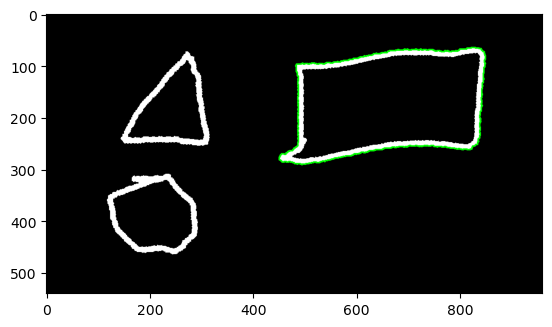

In [38]:
img=cv.imread("./Pictures/paint.jpg")
img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_,img1=cv.threshold(img1,127,255,cv.THRESH_BINARY_INV)
#plt.imshow(img1,cmap="gray")
kernel=np.ones((3,3))
close=cv.morphologyEx(img1, cv.MORPH_CLOSE, kernel)
#plt.imshow(close,cmap="gray")
kernel=np.ones((3,3))
close=cv.morphologyEx(close, cv.MORPH_CLOSE, kernel)
plt.imshow(close,cmap="gray")
contoures, hierarchy=cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
close1=cv.cvtColor(close,cv.COLOR_GRAY2BGR)
cv.drawContours(close1,contoures,4,(0,255,0),2)
plt.imshow(close1)

### Letter and Word Detection using Morphological Operations

This example demonstrates **detecting individual letters and words** in an image using thresholding and morphological operations.

---

#### Steps:

1. **Load and Preprocess Image**
   - Read the image and display it as the original.  
   - Convert to **grayscale**.  
   - Apply **binary inverse thresholding** (`cv.THRESH_BINARY_INV`) to make letters white on a black background.  

2. **Morphological Dilation**
   - Use a **rectangular kernel** `(10,15)` to dilate the thresholded image, which helps merge pixels of individual letters into word-like regions.  
   - Apply a second dilation with an **elliptical kernel** `(5,5)` to smooth and connect components further.  

3. **Contour Detection**
   - Use `cv.findContours()` to detect **letters or connected groups of letters (words)**.  
   - Draw **bounding rectangles** around each detected letter or word.  

4. **Visualization**
   - Left: Original image.  
   - Middle: Image showing detected **letters and words** after dilation.  
   - Right: Original image with rectangles for comparison.  

---

#### Notes:
- Adjusting kernel size changes whether you detect **letters individually** or **merge letters into words**.  
- Morphological operations are key for handling **fragmented text** or **closely spaced letters**.


Text(0.5, 1.0, 'word_image')

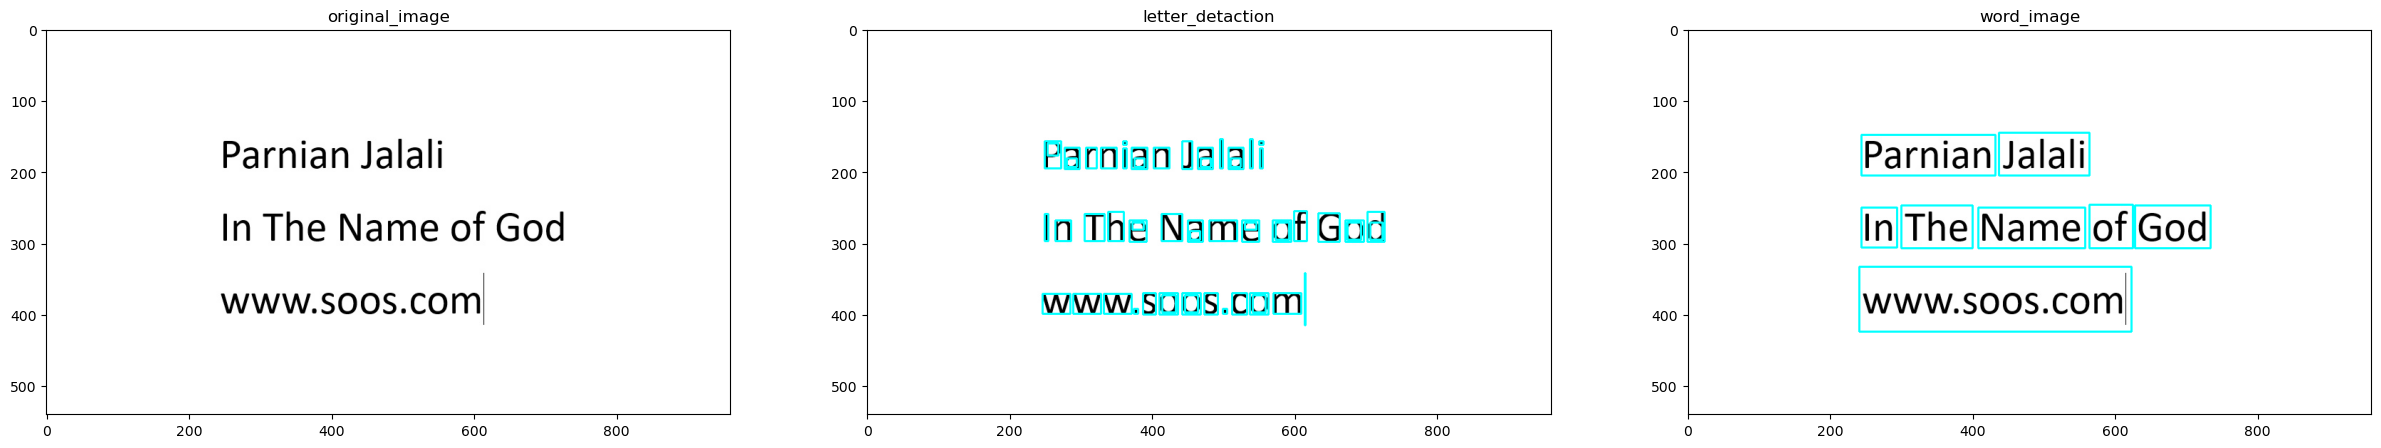

In [43]:
img=cv.imread("./Pictures/text.jpg")
fig=plt.figure(figsize=(30,20))
plt.subplot(1,3,1);plt.imshow(img,cmap="gray");plt.title("original_image")

img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_,img1=cv.threshold(img1,127,255,cv.THRESH_BINARY_INV)
#plt.imshow(img1,cmap="gray")

kernel=cv.getStructuringElement(cv.MORPH_RECT,(10,15))
img2=cv.dilate(img1,kernel,iterations=1)
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
img3=cv.dilate(img2,kernel,iterations=1)
#plt.imshow(img3,cmap="gray")

contours, hierarchy=cv.findContours(img1,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    x, y, w, h =cv.boundingRect(contours[i])
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

#plt.imshow(img) 
plt.subplot(1,3,2);plt.imshow(img,cmap="gray");plt.title("letter_detaction")

img=cv.imread("./Pictures/text.jpg")
contours, hierarchy=cv.findContours(img3,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    x, y, w, h =cv.boundingRect(contours[i])
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

#plt.imshow(img)   
plt.subplot(1,3,3);plt.imshow(img,cmap="gray");plt.title("word_image")


### Counting Coins using Contour Detection and Ellipse Fitting

This example demonstrates how to **detect and count coins** in an image using thresholding, morphological operations, and contours.

---

#### Steps:

1. **Load and Preprocess Image**
   - Read the image and convert it to **grayscale**.  
   - Apply **Gaussian blur** to reduce noise and smooth edges.  

2. **Thresholding**
   - Use **Otsu’s method** (`cv.THRESH_OTSU`) to automatically determine an optimal threshold.  
   - Compare with **adaptive mean** and **adaptive Gaussian thresholding** for robustness in non-uniform lighting conditions.  
   - Display the results to see which method best separates coins from the background.  

3. **Morphological Closing**
   - Use an **elliptical kernel** `(25,25)` and `cv.MORPH_CLOSE` to fill small holes in coins and merge broken regions.  

4. **Contour Detection**
   - Use `cv.findContours()` to detect contours of the coins.  
   - Filter out small contours (`len(cnt) < 70`) to ignore noise or tiny artifacts.  

5. **Ellipse Fitting**
   - Fit an **ellipse** to each valid contour using `cv.fitEllipse()`.  
   - Draw the ellipse on a copy of the original image to visualize detected coins.  

6. **Counting Coins**
   - Increment a counter `k` for each valid contour.  
   - Print the total number of coins detected.  

---

#### Notes:
- **Kernel size** for morphological operations affects whether coins are merged or split.  
- **Contour filtering** ensures small artifacts are ignored.  
- Ellipse fitting works well for nearly circular objects like coins.  


Text(0.5, 1.0, 'gaussian')

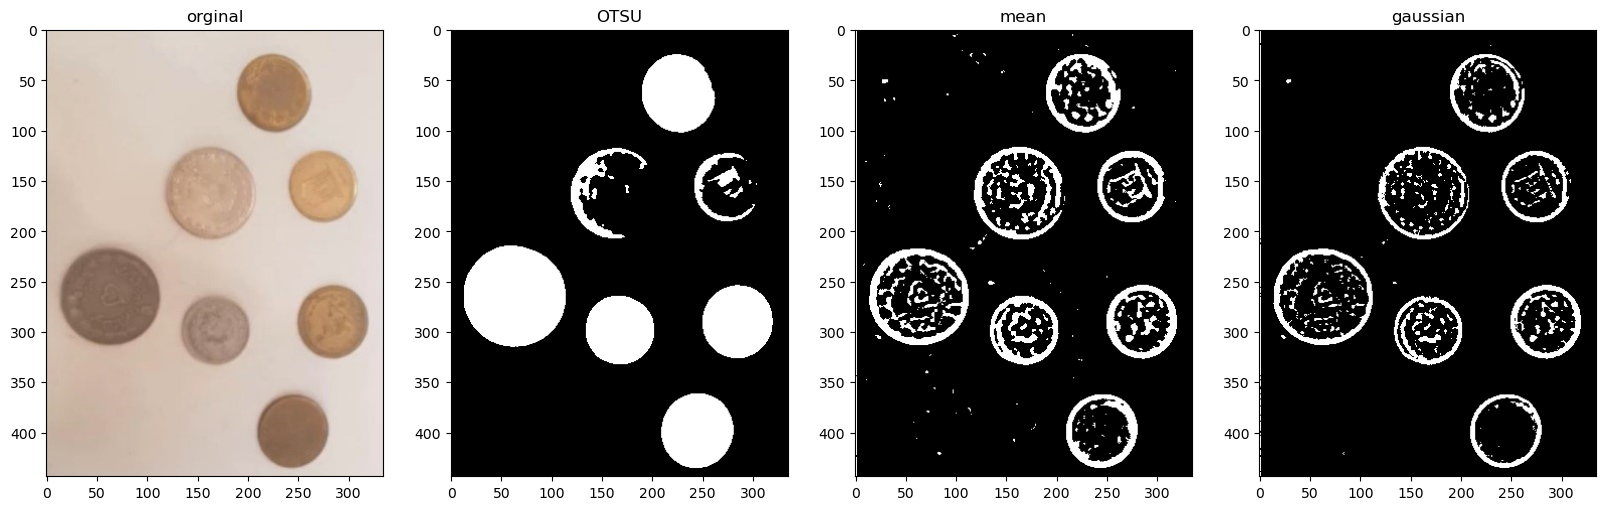

In [44]:
img=cv.imread("./Pictures/coin.jpg")
img1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blurred_img = cv.GaussianBlur(img1, (5, 5), 0)
_,img2=cv.threshold(blurred_img,127,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
img_adp_mean=cv.adaptiveThreshold(blurred_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,2)
img_adp_gus=cv.adaptiveThreshold(blurred_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,2)
fig=plt.figure(figsize=[20,30])
plt.subplot(141);plt.imshow(img[:,:,::-1]);plt.title("orginal")
plt.subplot(142);plt.imshow(img2,cmap="gray");plt.title("OTSU")
plt.subplot(143);plt.imshow(img_adp_mean,cmap="gray");plt.title("mean")
plt.subplot(144);plt.imshow(img_adp_gus,cmap="gray");plt.title("gaussian")

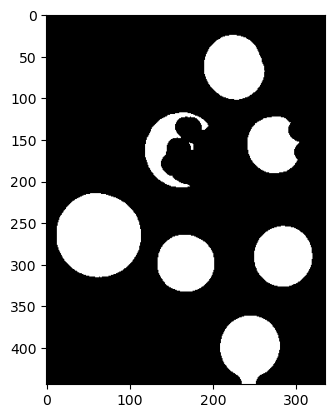

In [66]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(25,25))
close=cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel)
plt.imshow(close,cmap="gray")

contours, hierarchy=cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

temp=img.copy()
k=0
for cnt in contours:
    #print(len(contours[i]))
    if len(cnt)<70:
        continue
    ellipse = cv.fitEllipse(cnt)
    cv.ellipse(temp, ellipse, (0,255,0), 2)
    k+=1
plt.imshow(temp[:,:,::-1])
print(k)


7


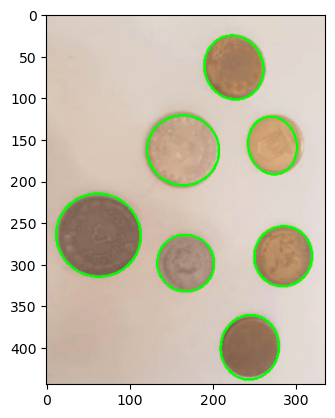

In [68]:
contours, hierarchy=cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
temp=img.copy()
k=0
for cnt in contours:
    #print(len(contours[i]))
    if len(cnt)<70:
        continue
    ellipse = cv.fitEllipse(cnt)
    cv.ellipse(temp, ellipse, (0,255,0), 2)
    k+=1
plt.imshow(temp[:,:,::-1])
print(k)